# Simple Linear Regression and Multiple Linear Regression

# Importing the necessary libaries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


data = pd.read_csv("Housing.csv")

In [2]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
print("Dataset Shape:", data.shape)

Dataset Shape: (545, 13)


In [4]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Exploratory Data Analysis (EDA)

C:\Users\Shlok Sonkusare\AppData\Local\Temp\ipykernel_14104\3875865588.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


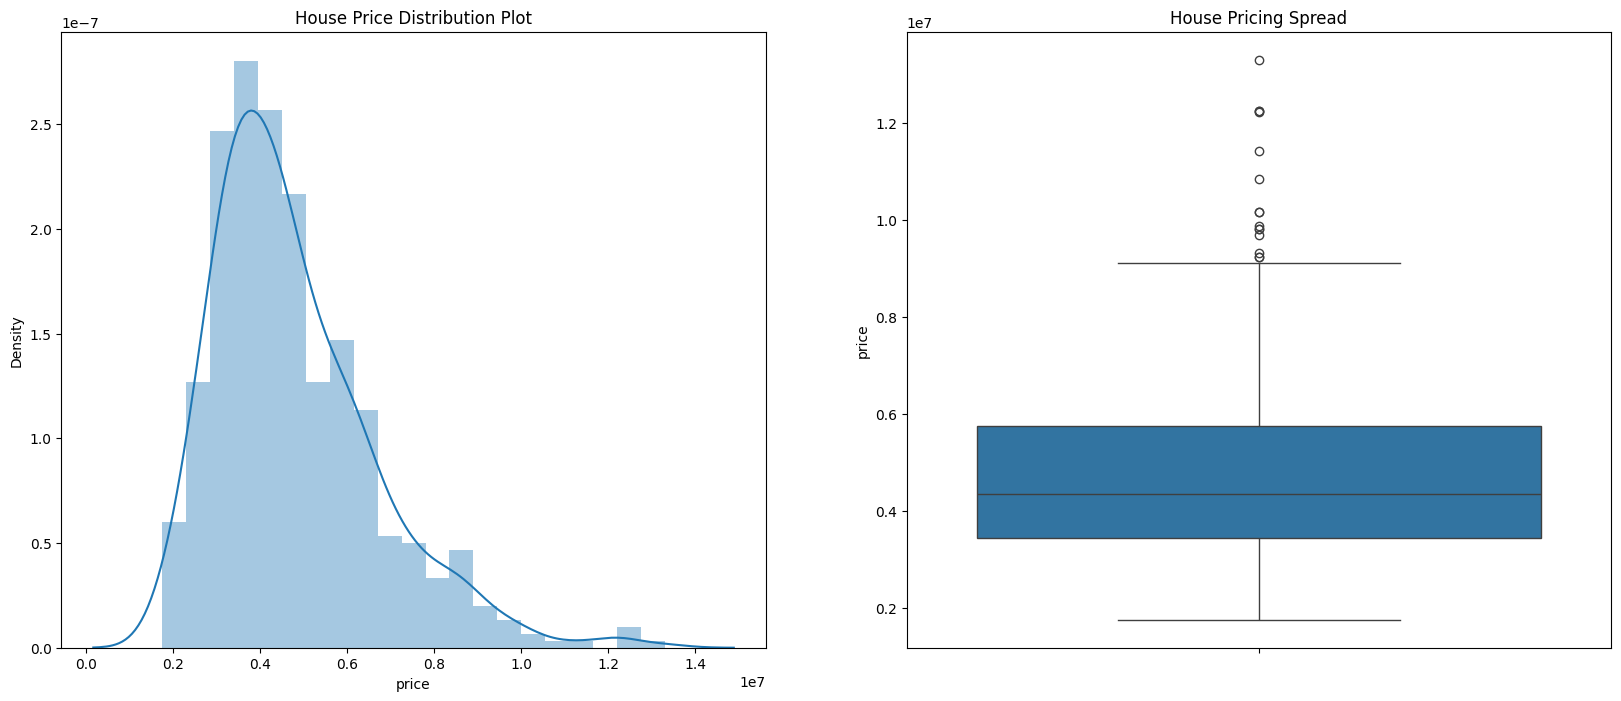

In [5]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
sns.boxplot(data.price)
plt.title('House Pricing Spread')

plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


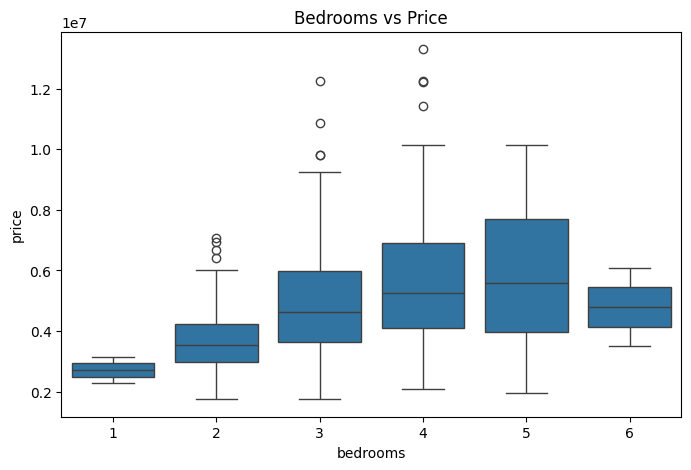

In [7]:
plt.figure(figsize=(8,5))

sns.boxplot(data=data, x='bedrooms', y='price')


plt.title('Bedrooms vs Price')
plt.show()

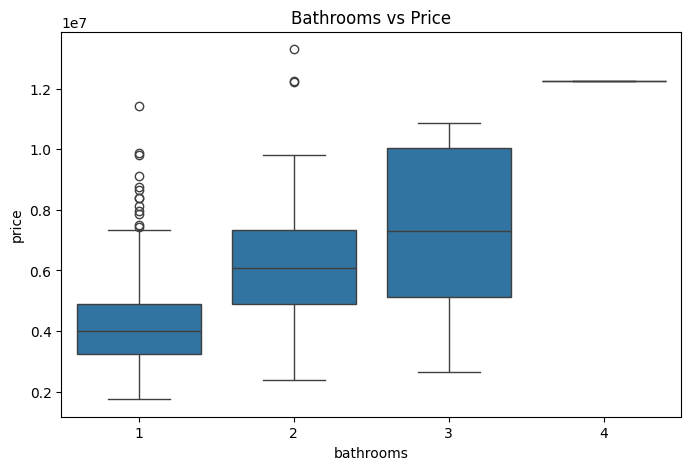

In [8]:
plt.figure(figsize=(8,5))

sns.boxplot(data=data, x='bathrooms',y='price')

plt.title('Bathrooms vs Price')
plt.show()

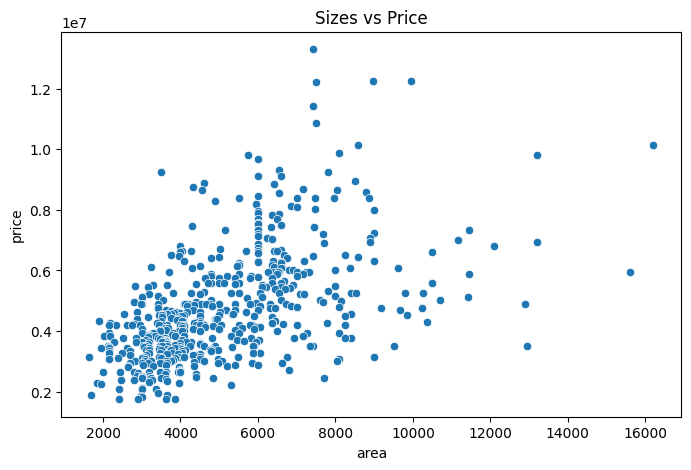

In [9]:
plt.figure(figsize=(8,5))

sns.scatterplot(data=data, x='area',y='price')

plt.title('Sizes vs Price')
plt.show()

# Simple Linear Regression

In [10]:

X1 = data[['area']]  
y1 = data['price']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print("Training data shape:", X1_train.shape)
print("Testing data shape:", X1_test.shape)


Training data shape: (436, 1)
Testing data shape: (109, 1)


In [11]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [12]:
Y1_pred = model.predict(X1_test)

print(Y1_pred)

[5024060.33139816 5279498.23656143 4232202.82539203 4640903.47365326
 4198144.43803692 5373158.80178796 6139472.51727777 4636646.17523387
 3891618.951841   3661724.83719406 6165016.3077941  4187075.46214652
 4095969.27597162 3832016.77396957 4202401.73645631 4057653.59019713
 3363713.94783691 5066633.31559204 5002773.83930122 5066633.31559204
 4649418.07049203 5417860.43519154 4065742.45719396 4130027.66332672
 6024525.4599543  6752523.48966962 3827759.47555018 3789443.78977569
 8131888.17755128 3789443.78977569 4215173.63171447 3840531.37080835
 5066633.31559204 5328457.16838439 4545114.25921703 4470611.53687774
 4490195.10960693 3866075.16132467 3993794.11390631 3698763.33344273
 5909578.40263083 4057653.59019713 5245439.84920633 4300319.60010223
 5385930.69704613 5017674.38376908 5066633.31559204 4487640.7305553
 5939379.49156655 3789443.78977569 5694584.83245175 3789443.78977569
 5820175.13582369 4428038.55268387 4061910.88861651 3751128.1040012
 4960200.85510734 3534005.88461242 5

In [13]:
score = root_mean_squared_error(y1_test,Y1_pred)
print('RMSE on test set:', score)

score = r2_score(y1_test,Y1_pred)
print('R square value on test set:', score)

RMSE on test set: 1917103.7021424233
R square value on test set: 0.27287851871974644


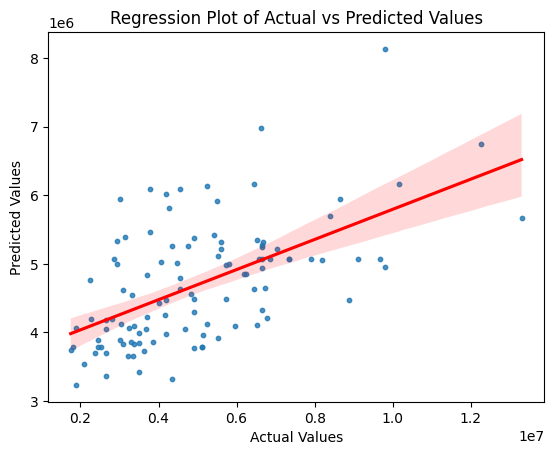

In [26]:
sns.regplot(x=y1_test, y=Y1_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot of Actual vs Predicted Values')

plt.show()


# Multiple Linear Regression 

In [15]:

X2 = data[['area', 'bedrooms', 'bathrooms']]  
y2 = data['price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

print("Training data shape:", X2_train.shape)
print("Testing data shape:", X2_test.shape)

Training data shape: (436, 3)
Testing data shape: (109, 3)


In [16]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [17]:
Y2_pred = model2.predict(X2_test)

print(Y2_pred)

[6383168.05981192 6230250.35140428 3597885.28090091 4289730.8386382
 3930445.60575177 4883933.33918115 5505773.16533075 6068793.48103629
 3321512.02483442 3495157.72744705 8731338.12527607 3561265.8244721
 3487335.97847431 3633344.35548029 3933900.2714526  6661080.95290716
 2893133.47793136 4635197.40872131 4583377.42320885 4274999.75826381
 4296640.17003986 4920207.32903988 3462807.85199841 3875170.95453847
 5412497.19140831 7425564.68389184 3269692.03932195 5021117.35611339
 7122556.71331971 3238600.04801447 5366583.9261965  3640253.68688195
 6057517.06636272 4847659.34932243 4572198.51082701 5573863.86824637
 4167435.67282878 4021179.33154444 3764621.65211187 5307730.62714319
 5319221.21748587 3456243.98716683 6202613.02579763 4013357.58257171
 4534099.68582614 4235271.10270425 6057517.06636272 4525560.52386579
 4983206.22693419 3238600.04801447 6567080.25723531 3238600.04801447
 4886475.58731091 4116997.55359665 4180093.95378268 3567705.7071645
 5971150.42384195 3391517.75642211 51

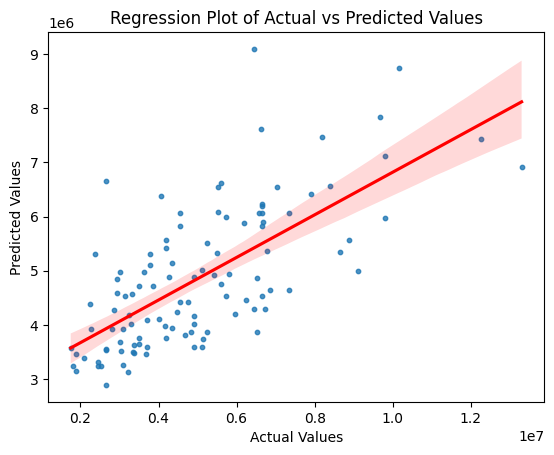

In [18]:
sns.regplot(x=y2_test, y=Y2_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot of Actual vs Predicted Values')

plt.show()


In [19]:
score = root_mean_squared_error(y2_test,Y2_pred)
print('RMSE on test set:', score)

score = r2_score(y2_test,Y2_pred)
print('R square value on test set:', score)

RMSE on test set: 1658324.6001036866
R square value on test set: 0.45592991188724463


Mean Squared Error on Training Set: 2204738681379.341


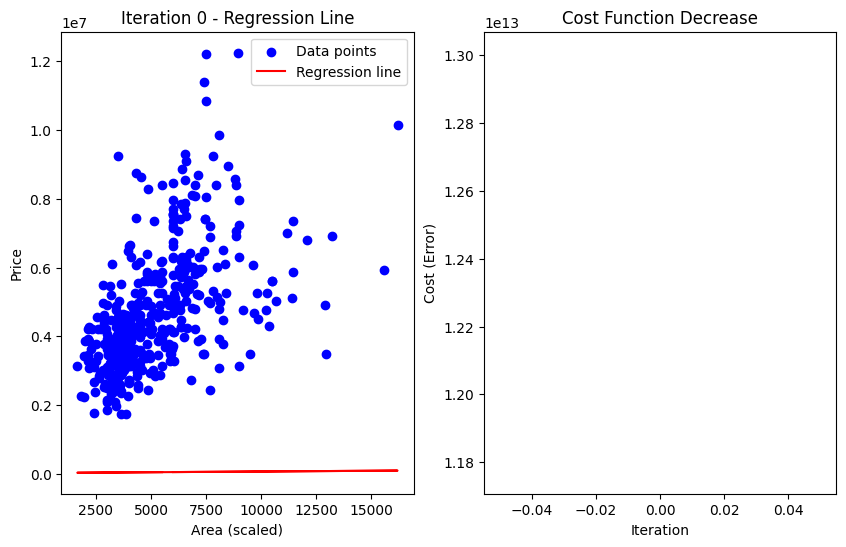

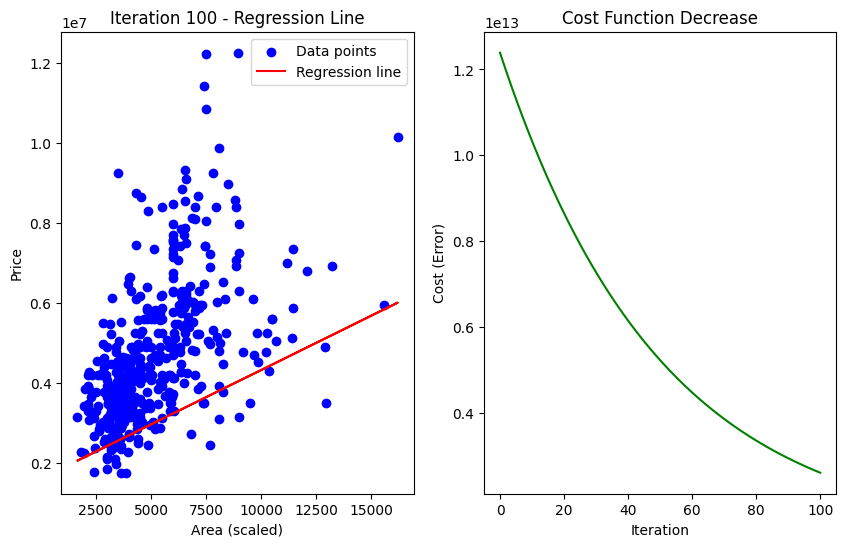

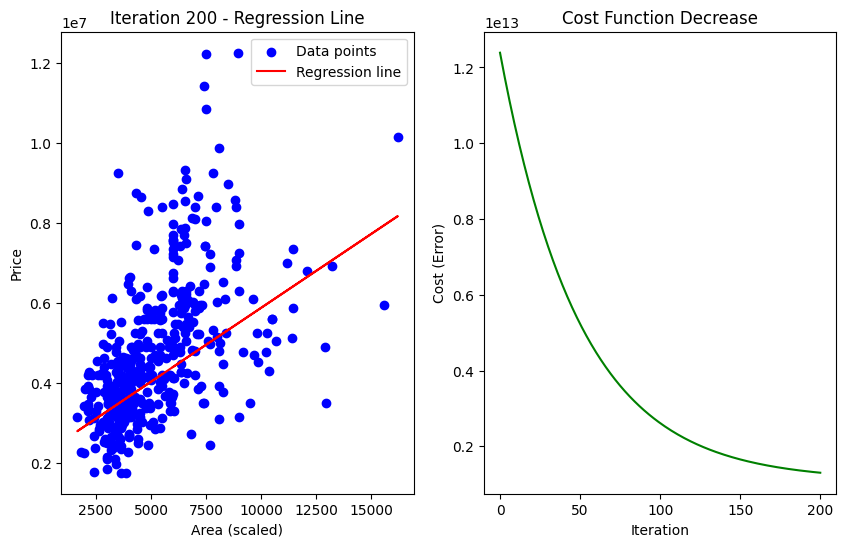

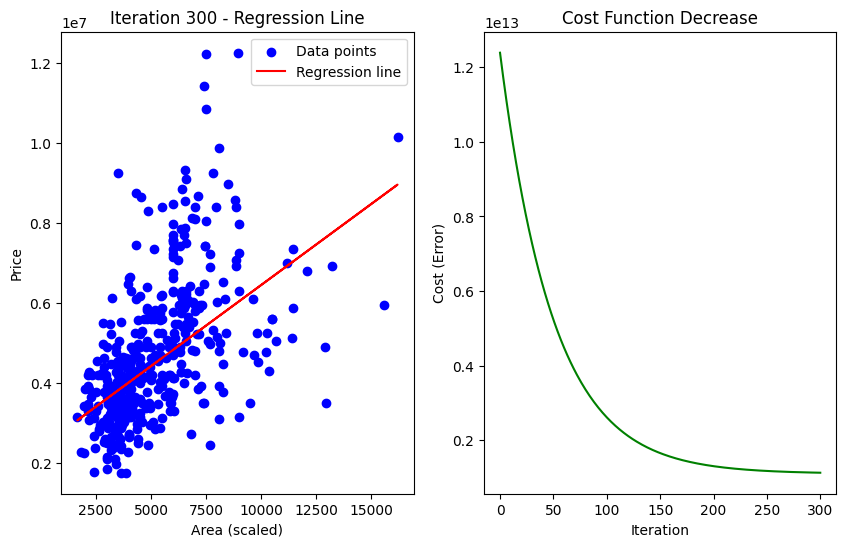

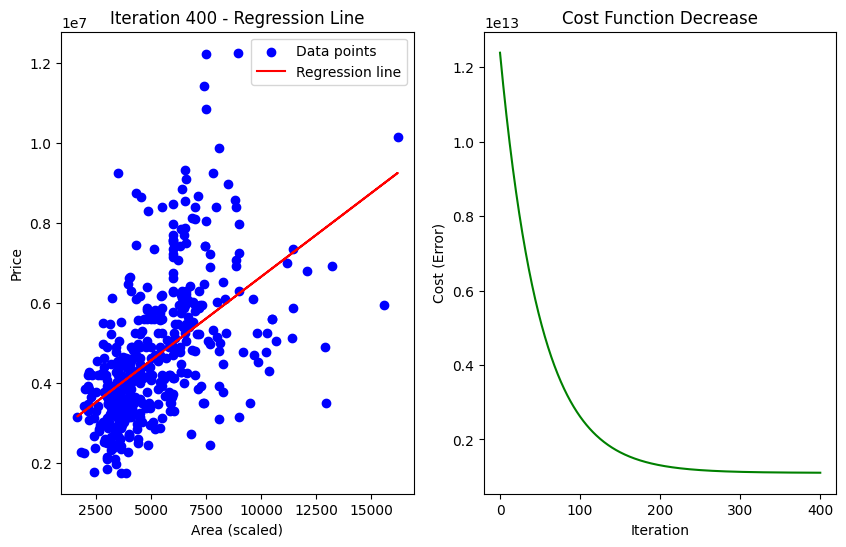

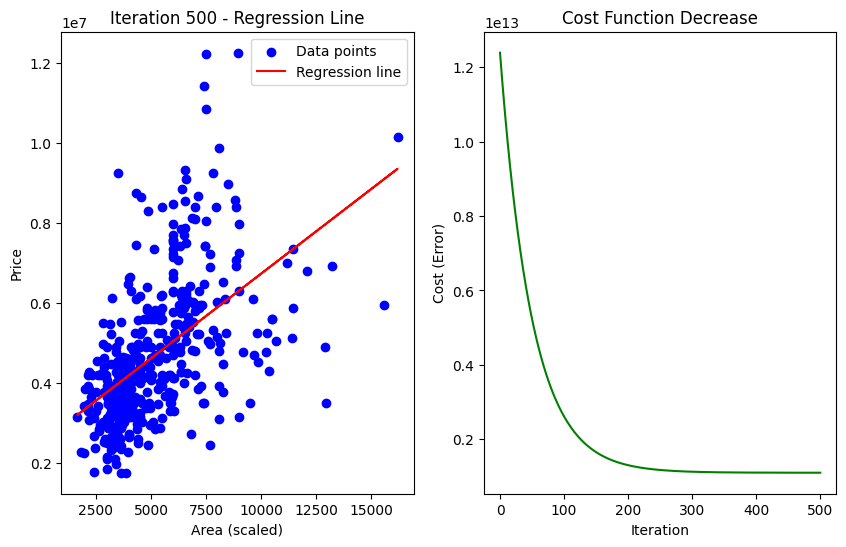

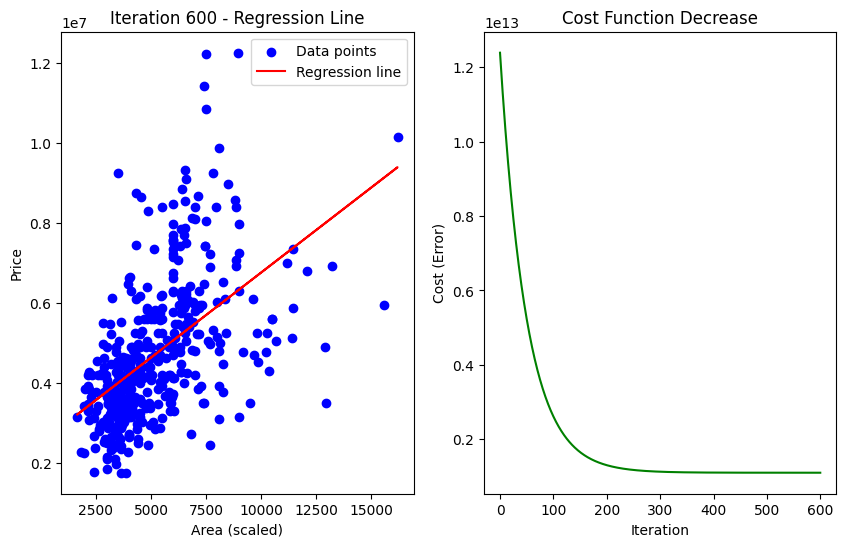

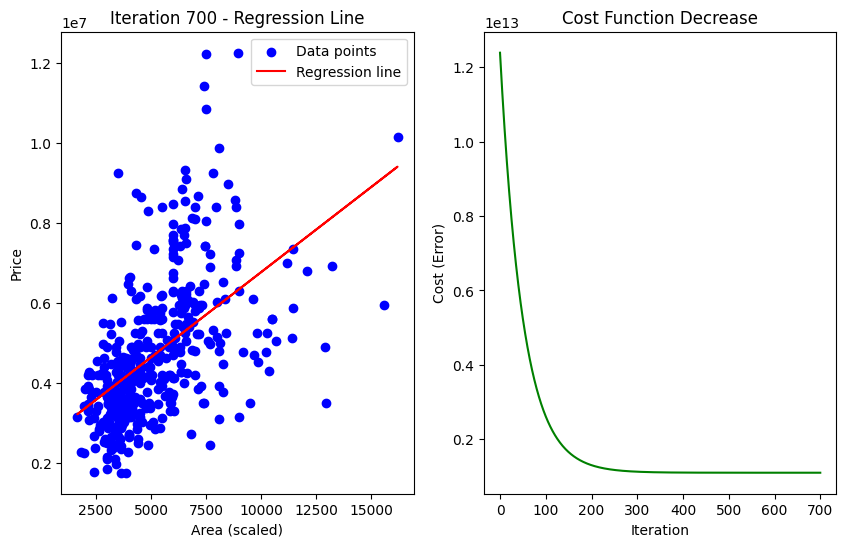

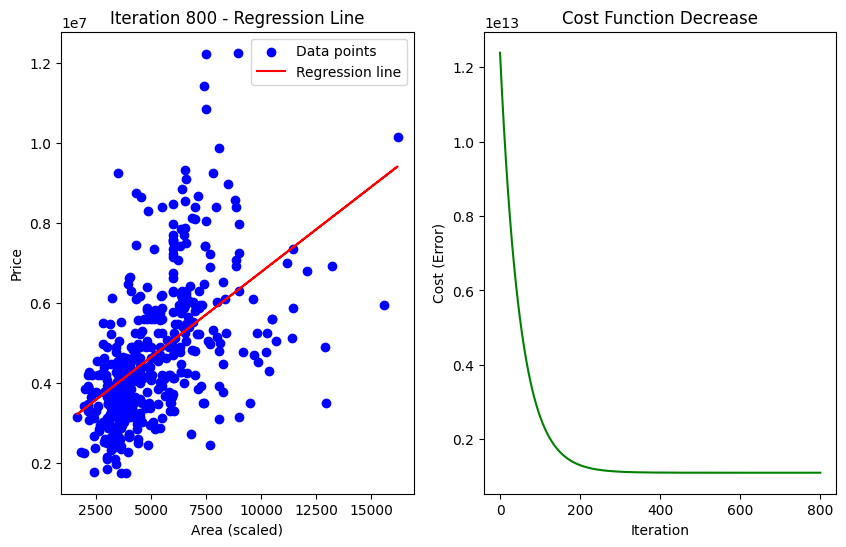

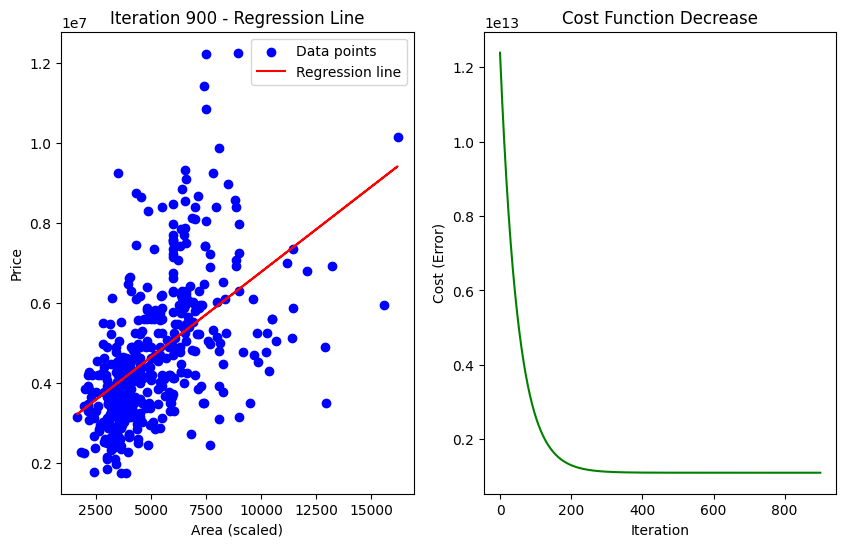

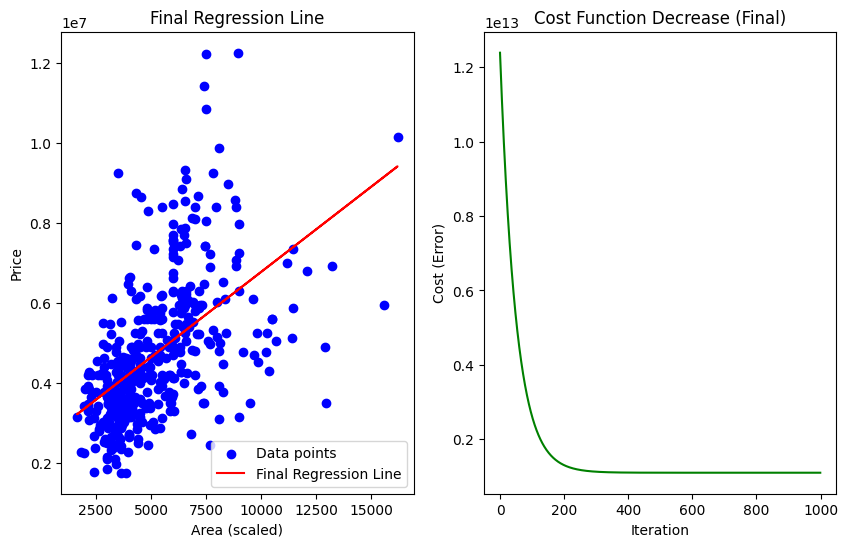

Final parameters (theta): [[4706324.19867892]
 [ 937324.82772314]]
Mean Squared Error after gradient descent: 2204738724301.756


In [20]:
X = data['area'].values.reshape(-1, 1)
y = data['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model2 = LinearRegression()

model2.fit(X_train_scaled, y_train)

y_train_pred = model2.predict(X_train_scaled)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error on Training Set: {mse}')

X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

# Hyperparameters
learning_rate = 0.01
iterations = 1000
m = len(X_train_b)

theta = np.random.randn(2, 1)

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

cost_history = []

for i in range(iterations):
    gradients = (1 / m) * X_train_b.T.dot(X_train_b.dot(theta) - y_train)
    theta -= learning_rate * gradients
    cost = compute_cost(X_train_b, y_train, theta)
    cost_history.append(cost)
    
    if i % 100 == 0:  
        plt.figure(figsize=(10, 6))

        plt.subplot(1, 2, 1)
        plt.scatter(X_train, y_train, color='blue', label='Data points')
        plt.plot(X_train, X_train_b.dot(theta), color='red', label='Regression line')
        plt.xlabel('Area (scaled)')
        plt.ylabel('Price')
        plt.title(f'Iteration {i} - Regression Line')
        plt.legend()

        # Plot the cost function curve
        plt.subplot(1, 2, 2)
        plt.plot(range(i+1), cost_history, color='green')
        plt.xlabel('Iteration')
        plt.ylabel('Cost (Error)')
        plt.title('Cost Function Decrease')

        plt.show()

plt.figure(figsize=(10, 6))

# Final regression line plot
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Data points')
plt.plot(X_train, X_train_b.dot(theta), color='red', label='Final Regression Line')
plt.xlabel('Area (scaled)')
plt.ylabel('Price')
plt.title('Final Regression Line')
plt.legend()

# Plot the cost function history
plt.subplot(1, 2, 2)
plt.plot(range(iterations), cost_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost (Error)')
plt.title('Cost Function Decrease (Final)')

plt.show()

print(f'Final parameters (theta): {theta}')

y_train_pred_final = X_train_b.dot(theta)
final_mse = mean_squared_error(y_train, y_train_pred_final)
print(f'Mean Squared Error after gradient descent: {final_mse}')


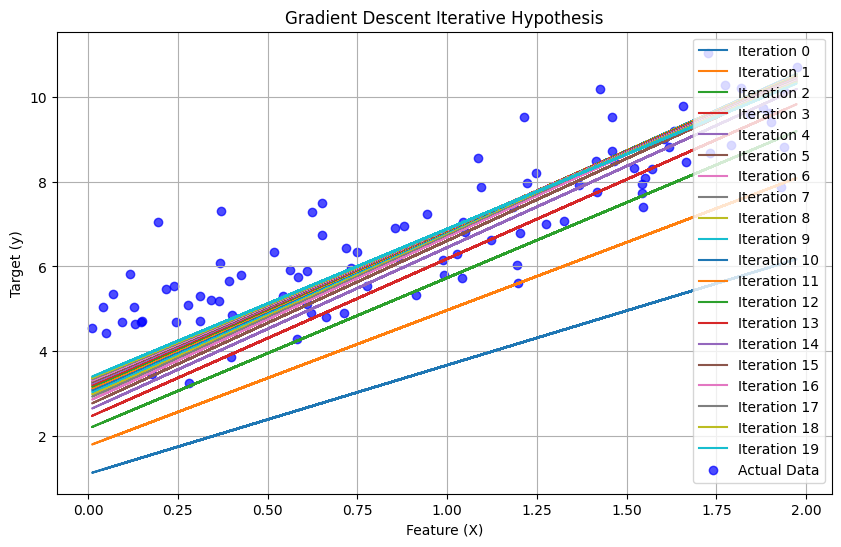

In [21]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]

theta = np.random.randn(2, 1)
learning_rate = 0.1
n_iterations = 20
m = len(X_b)

def plot_gradient_descent(X_b, y, theta, learning_rate, n_iterations, m):
    plt.figure(figsize=(10, 6))
    for iteration in range(n_iterations):
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients

        if iteration % 1 == 0:
            y_pred = X_b.dot(theta)
            plt.plot(X, y_pred, label=f"Iteration {iteration}")

    plt.scatter(X, y, color='blue', label="Actual Data", alpha=0.7)
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title("Gradient Descent Iterative Hypothesis")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_gradient_descent(X_b, y, theta, learning_rate, n_iterations, m)

# Feature Extraction

In [22]:
df = pd.DataFrame(data)

X = df.drop(columns=['price'])
y = df['price']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['area', 'bedrooms', 'bathrooms']),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['prefarea'])  # Use sparse_output instead of sparse
    ])

X_transformed = preprocessor.fit_transform(X)

column_names = ['area', 'bedrooms', 'bathrooms'] + list(preprocessor.transformers_[1][1].get_feature_names_out(['prefarea']))
X_transformed_df = pd.DataFrame(X_transformed, columns=column_names)

print(X_transformed_df.head())


       area  bedrooms  bathrooms  prefarea_yes
0  1.046726  1.403419   1.421812           1.0
1  1.757010  1.403419   5.405809           0.0
2  2.218232  0.047278   1.421812           1.0
3  1.083624  1.403419   1.421812           1.0
4  1.046726  1.403419  -0.570187           0.0
